# Assignment1

### Problem 1

Download the file named "memorial_hdr.npy", load it, and try to display the image denoted as $f$. The image $f$ presents challenges for analysis and manipulation. Design a script called "my_itf" with an intensity transformation function that will make this image "better".

First of all, We need to check the image $f$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


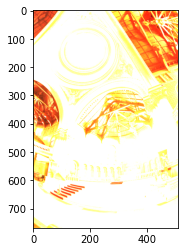

In [2]:
import matplotlib.pyplot as plt
import numpy as np

f = np.load('./memorial_hdr.npy')
plt.imshow(f)

`plt.imshow` Clipping input data to the valid range, so if the image's intensity is not from valid range, we should change the dtype of images.

In [3]:
print(f.dtype)

float32


Usually We can use uint8 (0 ~ 255) intensity. So I change the image $f$'s intensity to uint8

In [4]:
f = f.astype(np.uint8)
print(f.dtype)

uint8


Now We can see the right picture.

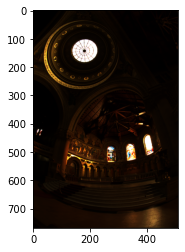

In [5]:
plt.imshow(f)

This picture is too dark, so we can use a **Log Transformation** which expan the values of dark pixels in an image while compressing the higher-level values.

In [6]:
def my_itf(f, c):
    g = c * np.log(f)
    g = g.astype(np.uint8)
    return g

<ipython-input-6-18a62ecc6b65>:2: RuntimeWarning: divide by zero encountered in log
  g = c * np.log(f)


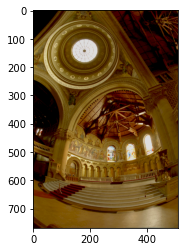

In [7]:
plt.imshow(my_itf(f,40))

## Problem 2

Download the file named "memorial_hdr.npy", load it, and try to display the image denoted as $f$

(a) Implement a histogram equalization function, as follows:

Apply histogram equalization in red, greed, and blue channels separately. Do not use any built-in functions such as equalizeHist()

In [8]:
f = np.load('./memorial_hdr.npy')
f = f.astype(np.uint8)

In [9]:
def histogram_eqaulization1(input_image):
    red = seperate_eqaulization1(input_image[:,:,0]).reshape(768,512,1)
    green = seperate_eqaulization1(input_image[:,:,1]).reshape(768,512,1)
    blue = seperate_eqaulization1(input_image[:,:,2]).reshape(768,512,1)
    return np.concatenate([red, green, blue],axis=2)

def seperate_eqaulization1(input_image):
    histo, bins = np.histogram(input_image.flatten(), 256, [0,256])
    cum_den_f = histo.cumsum()
    cdf_m = np.ma.masked_equal(cum_den_f, 0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[input_image]

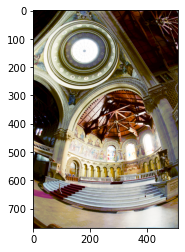

In [10]:
h = histogram_eqaulization1(f)
plt.imshow(h)

(b) Compute one histogram from all red, green, and blue channels. Apply the same histogram equalization to red, green, and blue channels using the function implemented in (b).

In [11]:
def histogram_eqaulization2(input_image):
    histo, bins = np.histogram(input_image.flatten(), 256, [0,256])
    cum_den_f = histo.cumsum()
    cdf_m = np.ma.masked_equal(cum_den_f, 0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[input_image]

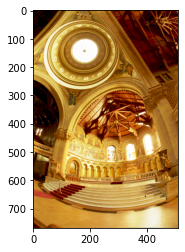

In [12]:
i = histogram_eqaulization2(f)
plt.imshow(i)

Explain why there is more color shift in $h$ compared to $i$.

This is because applying histogram equalization to each channel can provide more diverse intensities than applying it including all channels.

## Problem 3

Download "rubiks_cube.png". Some pixels are corrupted by noise.

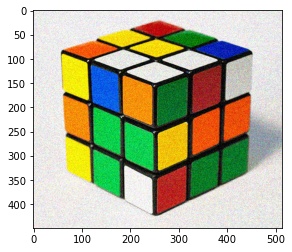

In [25]:
f = plt.imread('rubiks_cube.png')
plt.imshow(f)

(a) Design a function called "Bilateral Filter" as follows

In [32]:
def Bilateralfilter(f, w, sigma_d, sigma_r):
    height, width, channels = f.shape
    output = np.zeros((height, width, channels))
    
    for x in range(width):
        for y in range(height):
            I = f[y,x, :]
            Wp = 0
            If = np.zeros(channels)
            for fx in range(max(x-w, 0), min(x+w+1, width)):
                for fy in range(max(y-w, 0), min(y+w+1, height)):
                    Ip = f[fy, fx, :]
                    d = np.sqrt((x-fx)**2 + (y-fy)**2)
                    intensity_dif = np.linalg.norm(I - Ip)
                    
                    Wd = np.exp(-(d**2)/(2*sigma_d**2))
                    Wr = np.exp(-(intensity_dif**2)/(2*sigma_r**2))
                    
                    W = Wd*Wr
                    Wp += W
                    If += W*Ip
            output[y,x, :] = If/Wp
            
    return output
    

In [36]:
f = f.astype(np.uint8)
g = Bilateralfilter(f, 20, 0.7, 0.7)

KeyboardInterrupt: 

(449, 513, 3)